# 自动微分简单例子

In [1]:
import tensorflow as tf

x = tf.range(4, dtype=tf.float32)

x = tf.Variable(x)

with tf.GradientTape() as t:
    y = 2 * tf.tensordot(x, x, axes=1)
x_grad = t.gradient(y, x)
# t.gradient(y, x)对在with tf.GradientTape() as t:中的计算过程进行求导
y
x
x_grad

2024-09-11 11:07:34.103563: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-09-11 11:07:34.104371: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-11 11:07:34.107323: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 0.,  4.,  8., 12.], dtype=float32)>

In [7]:
# 分离计算
with tf.GradientTape(persistent=True) as t:
    y = x * x
    u = tf.stop_gradient(y)
    z = u * x

x_grad = t.gradient(z, x)
x_grad == u

t.gradient(y, x) == 2 * x

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True,  True,  True])>

In [17]:
def f(a):
    b = a * 2
    while tf.norm(b) < 1000:
        b = b * 2
    if tf.reduce_sum(b) > 0:
        c = b
    else:
        c = 100 * b
    return c

a = tf.Variable(tf.random.normal(shape=()))
a

with tf.GradientTape() as t:
    d = f(a)

d_grad = t.gradient(d, a)
d_grad

d_grad == d / a

<tf.Tensor: shape=(), dtype=bool, numpy=True>

现在可以分析上面定义的f函数。 请注意，它在其输入a中是分段线性的。 换言之，对于任何a，存在某个常量标量k，使得f(a)=k*a，其中k的值取决于输入a，因此可以用d/a验证梯度是否正确。

> 深度学习里面提到的自动微分其实就是自动计算导数的意思。

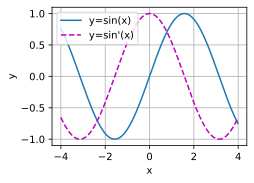

In [18]:
# f(x) = sin(x),绘制f(x) = df(x) / dx的图像，不使用f'(x) = cos(x)
import numpy as np
from d2l import tensorflow as d2l

x = tf.range(-4, 4, 0.01)
x = tf.Variable(x) # 存储梯度值

with tf.GradientTape() as t:
    y = tf.sin(x)
dy_dx = t.gradient(y, x)

x = np.array(x)
y = np.array(y)
dy_dx = np.array(dy_dx)

d2l.plot(x, [y, dy_dx], 'x', 'y', legend=['y=sin(x)', 'y=sin\'(x)'])